In [41]:
import numpy as np
import pandas as pd

df = pd.read_csv('uber.csv')

In [43]:
df.sample(7)

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
13200,32388221,58:16.0,7.7,2012-06-28 08:58:16 UTC,-74.005574,40.745958,-73.987534,40.749808,1
111874,25875395,48:00.0,6.1,2009-11-04 10:48:00 UTC,-73.974078,40.765260,-73.979548,40.777763,1
23595,4252867,09:19.0,12.1,2011-12-08 17:09:19 UTC,-73.999692,40.761332,-74.003899,40.741910,1
13038,13003862,16:00.0,10.1,2010-11-18 14:16:00 UTC,-73.963968,40.808180,-73.951258,40.785917,4
79083,46296438,54:03.0,7.0,2014-09-28 21:54:03 UTC,-73.986319,40.734757,-74.002116,40.745187,1
195815,42058222,21:00.0,5.0,2013-07-30 22:21:00 UTC,-73.968682,40.762242,-73.975690,40.752692,2
68094,37136291,14:54.0,12.1,2011-04-15 03:14:54 UTC,-73.993283,40.762737,-73.938328,40.792056,1


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


###  REMOVING THE MISSING DATA

In [47]:
def remove_missing_rows(df, columns):
    df.columns = df.columns.str.strip()
    df_cleaned = df.dropna(subset=columns)   
    return df_cleaned
    
df = remove_missing_rows(df, ['dropoff_longitude', 'dropoff_latitude'])

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199999 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         199999 non-null  int64  
 1   key                199999 non-null  object 
 2   fare_amount        199999 non-null  float64
 3   pickup_datetime    199999 non-null  object 
 4   pickup_longitude   199999 non-null  float64
 5   pickup_latitude    199999 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    199999 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 15.3+ MB


### HANDLING TIME AND DATE

In [51]:
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'],utc=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199999 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   Unnamed: 0         199999 non-null  int64              
 1   key                199999 non-null  object             
 2   fare_amount        199999 non-null  float64            
 3   pickup_datetime    199999 non-null  datetime64[ns, UTC]
 4   pickup_longitude   199999 non-null  float64            
 5   pickup_latitude    199999 non-null  float64            
 6   dropoff_longitude  199999 non-null  float64            
 7   dropoff_latitude   199999 non-null  float64            
 8   passenger_count    199999 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(2), object(1)
memory usage: 15.3+ MB


In [53]:
df['month']=df['pickup_datetime'].dt.month
df['year']=df['pickup_datetime'].dt.year
df['date']=df['pickup_datetime'].dt.day
df['hour']=df['pickup_datetime'].dt.hour
df['min']=df['pickup_datetime'].dt.minute
df['sec']=df['pickup_datetime'].dt.second
df['weekday']=df['pickup_datetime'].dt.weekday
df=df.drop(['pickup_datetime'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199999 entries, 0 to 199999
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         199999 non-null  int64  
 1   key                199999 non-null  object 
 2   fare_amount        199999 non-null  float64
 3   pickup_longitude   199999 non-null  float64
 4   pickup_latitude    199999 non-null  float64
 5   dropoff_longitude  199999 non-null  float64
 6   dropoff_latitude   199999 non-null  float64
 7   passenger_count    199999 non-null  int64  
 8   month              199999 non-null  int32  
 9   year               199999 non-null  int32  
 10  date               199999 non-null  int32  
 11  hour               199999 non-null  int32  
 12  min                199999 non-null  int32  
 13  sec                199999 non-null  int32  
 14  weekday            199999 non-null  int32  
dtypes: float64(5), int32(7), int64(2), object(1)
memory usag

### CALCULATING THE DISTANCE

In [55]:
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in kilometers

    # Convert degrees to radians
    lat1 = np.radians(lat1)
    lon1 = np.radians(lon1)
    lat2 = np.radians(lat2)
    lon2 = np.radians(lon2)

    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    distance = R * c

    return distance

# Apply the function to calculate distance for each row
df['distance_km'] = haversine(df['pickup_latitude'], df['pickup_longitude'],
                              df['dropoff_latitude'], df['dropoff_longitude'])

### REMOVING UNNECESSARY FEATURES

In [57]:

df=df.drop(['key'],axis=1)
corr_matrix = df.corr()
fare_amount_corr = corr_matrix['fare_amount']
fare_amount_corr 

Unnamed: 0           0.000587
fare_amount          1.000000
pickup_longitude     0.010458
pickup_latitude     -0.008482
dropoff_longitude    0.008986
dropoff_latitude    -0.011014
passenger_count      0.010158
month                0.023813
year                 0.118331
date                 0.001384
hour                -0.021463
min                 -0.008043
sec                 -0.001273
weekday              0.007508
distance_km          0.024684
Name: fare_amount, dtype: float64

In [59]:
df=df.drop(['Unnamed: 0'],axis=1)
df=df.drop(['date'],axis=1)
df=df.drop(['sec'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199999 entries, 0 to 199999
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        199999 non-null  float64
 1   pickup_longitude   199999 non-null  float64
 2   pickup_latitude    199999 non-null  float64
 3   dropoff_longitude  199999 non-null  float64
 4   dropoff_latitude   199999 non-null  float64
 5   passenger_count    199999 non-null  int64  
 6   month              199999 non-null  int32  
 7   year               199999 non-null  int32  
 8   hour               199999 non-null  int32  
 9   min                199999 non-null  int32  
 10  weekday            199999 non-null  int32  
 11  distance_km        199999 non-null  float64
dtypes: float64(6), int32(5), int64(1)
memory usage: 16.0 MB


### EDA

In [61]:
import seaborn as sns
df.skew()

fare_amount           4.504900
pickup_longitude     -7.495874
pickup_latitude      62.976706
dropoff_longitude   -71.505102
dropoff_latitude     -8.031012
passenger_count      18.145667
month                 0.109273
year                  0.063026
hour                 -0.433747
min                  -0.002585
weekday              -0.039968
distance_km          22.198177
dtype: float64

<Axes: ylabel='pickup_longitude'>

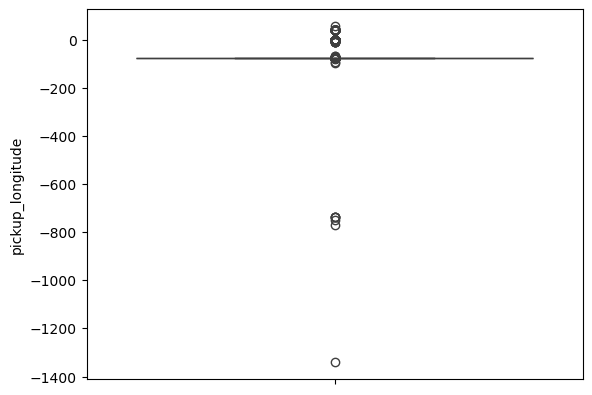

In [63]:
sns.boxplot(df['pickup_longitude'])

<Axes: ylabel='pickup_latitude'>

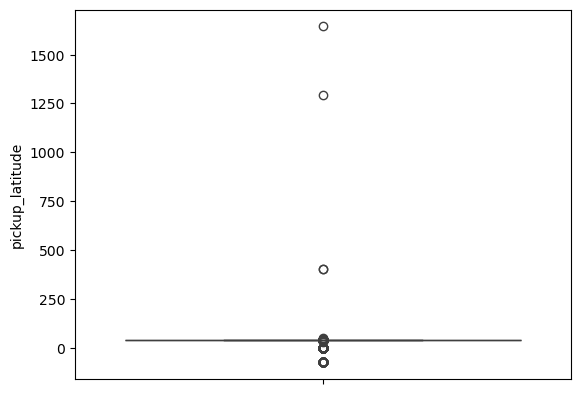

In [233]:
sns.boxplot(df['pickup_latitude'])

<Axes: ylabel='passenger_count'>

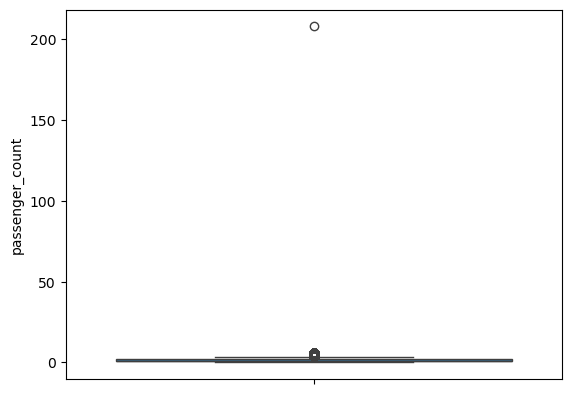

In [92]:
sns.boxplot(df['passenger_count'])

<Axes: ylabel='dropoff_longitude'>

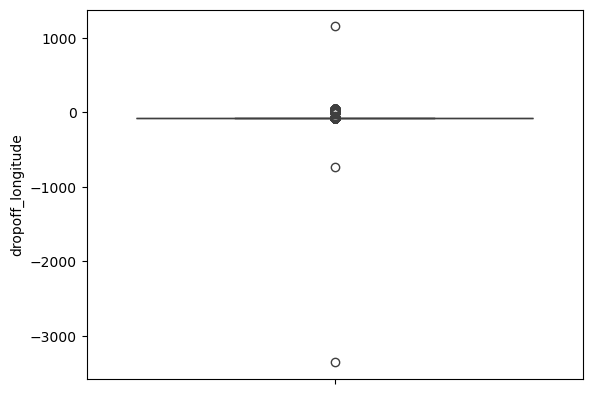

In [94]:
sns.boxplot(df['dropoff_longitude'])

<Axes: ylabel='distance_km'>

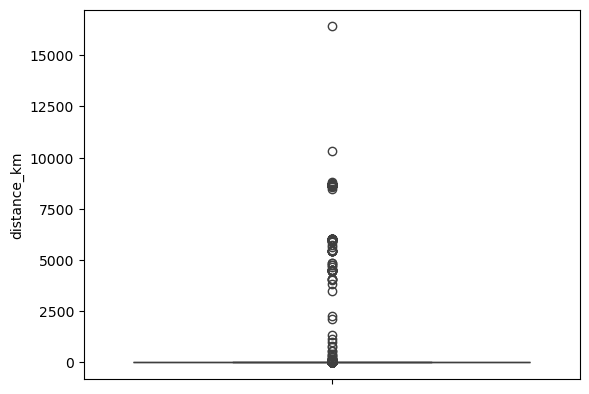

In [179]:
sns.boxplot(df['distance_km'])

### REMOVING OULIERS OF SKEWED DISTRIBUTED COLUMNS

In [65]:
for col in df:
    if col!='fare_amount':
       # print(col)
        per75=df[col].quantile(0.75)
        per25=df[col].quantile(0.25)
        iqr=per75-per25
        ul=per75+1.5*iqr
        ll=per25-1.5*iqr

        df[col]=np.where( 
            df[col]>ul,
            ul,
            np.where(
                df[col]<ll,
                ll,
                df[col]  ))

   
       

In [67]:
df.skew()

fare_amount          4.504900
pickup_longitude     0.705148
pickup_latitude     -0.438014
dropoff_longitude    0.733910
dropoff_latitude    -0.354558
passenger_count      1.393353
month                0.109273
year                 0.063026
hour                -0.433747
min                 -0.002585
weekday             -0.039968
distance_km          1.051504
dtype: float64

<Axes: ylabel='pickup_longitude'>

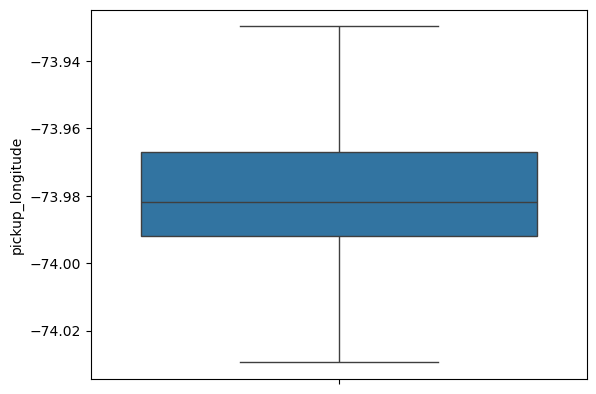

In [27]:
sns.boxplot(df['pickup_longitude'])

<Axes: ylabel='pickup_latitude'>

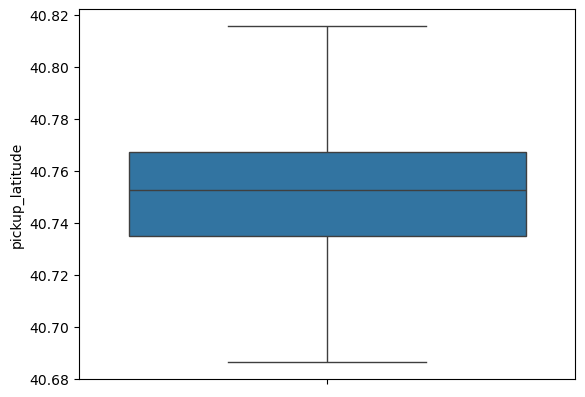

In [104]:
sns.boxplot(df['pickup_latitude'])

<Axes: ylabel='passenger_count'>

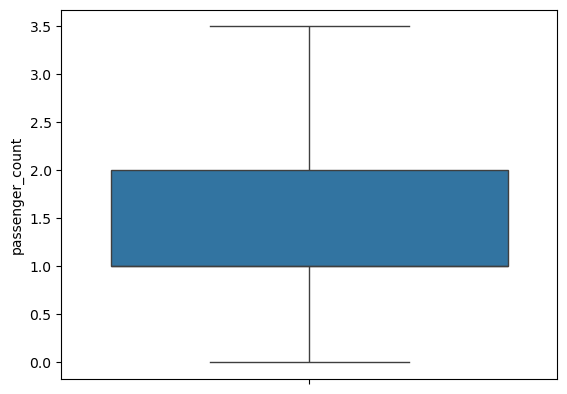

In [106]:
sns.boxplot(df['passenger_count'])

<Axes: ylabel='dropoff_longitude'>

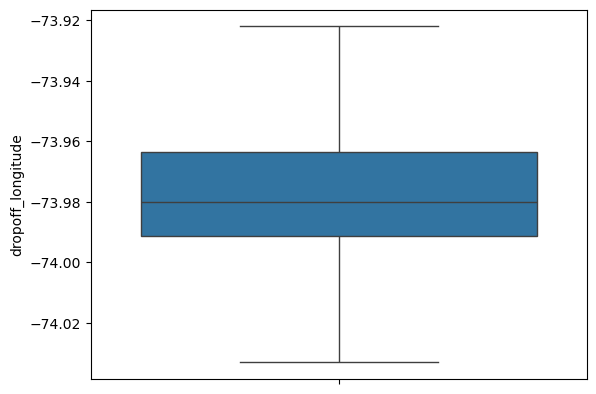

In [108]:
sns.boxplot(df['dropoff_longitude'])

<Axes: ylabel='distance_km'>

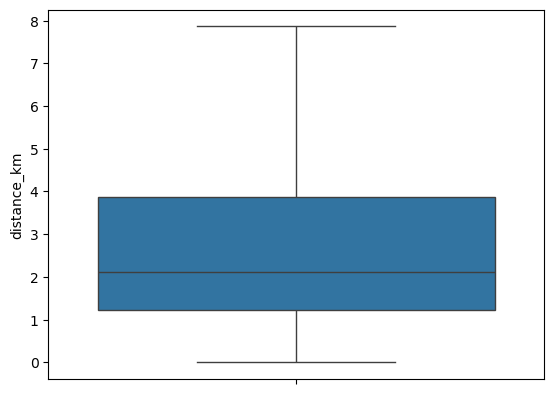

In [110]:
sns.boxplot(df['distance_km'])

In [69]:
df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,month,year,hour,min,weekday,distance_km
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1.0,5.0,2015.0,19.0,52.0,3.0,1.683323
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1.0,7.0,2009.0,20.0,4.0,4.0,2.457590
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1.0,8.0,2009.0,21.0,45.0,0.0,5.036377
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3.0,6.0,2009.0,8.0,22.0,4.0,1.661683
4,16.0,-73.929787,40.744085,-73.973082,40.761247,3.5,8.0,2014.0,17.0,47.0,3.0,4.475450
...,...,...,...,...,...,...,...,...,...,...,...,...
199995,3.0,-73.987042,40.739367,-73.986525,40.740297,1.0,10.0,2012.0,10.0,49.0,6.0,0.112210
199996,7.5,-73.984722,40.736837,-74.006672,40.739620,1.0,3.0,2014.0,1.0,9.0,4.0,1.875050
199997,30.9,-73.986017,40.756487,-73.922036,40.692588,2.0,6.0,2009.0,0.0,42.0,0.0,7.865091
199998,14.5,-73.997124,40.725452,-73.983215,40.695416,1.0,5.0,2015.0,14.0,56.0,2.0,3.539715


In [71]:
x=df['fare_amount']
x

0          7.5
1          7.7
2         12.9
3          5.3
4         16.0
          ... 
199995     3.0
199996     7.5
199997    30.9
199998    14.5
199999    14.1
Name: fare_amount, Length: 199999, dtype: float64

In [73]:
y=df.drop(['fare_amount'],axis=1)
y

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,month,year,hour,min,weekday,distance_km
0,-73.999817,40.738354,-73.999512,40.723217,1.0,5.0,2015.0,19.0,52.0,3.0,1.683323
1,-73.994355,40.728225,-73.994710,40.750325,1.0,7.0,2009.0,20.0,4.0,4.0,2.457590
2,-74.005043,40.740770,-73.962565,40.772647,1.0,8.0,2009.0,21.0,45.0,0.0,5.036377
3,-73.976124,40.790844,-73.965316,40.803349,3.0,6.0,2009.0,8.0,22.0,4.0,1.661683
4,-73.929787,40.744085,-73.973082,40.761247,3.5,8.0,2014.0,17.0,47.0,3.0,4.475450
...,...,...,...,...,...,...,...,...,...,...,...
199995,-73.987042,40.739367,-73.986525,40.740297,1.0,10.0,2012.0,10.0,49.0,6.0,0.112210
199996,-73.984722,40.736837,-74.006672,40.739620,1.0,3.0,2014.0,1.0,9.0,4.0,1.875050
199997,-73.986017,40.756487,-73.922036,40.692588,2.0,6.0,2009.0,0.0,42.0,0.0,7.865091
199998,-73.997124,40.725452,-73.983215,40.695416,1.0,5.0,2015.0,14.0,56.0,2.0,3.539715


### TRAIN TEST SPLIT

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(y,x,test_size=0.1)

X_train.shape, X_test.shape

((179999, 11), (20000, 11))

### SCALING

In [77]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
print(pd.DataFrame(X_train))

              0         1         2         3         4         5         6   \
0       0.344685  0.044381  0.336401  0.626632  0.554334  1.372576 -0.937991   
1       0.484891  0.347182  1.348846  0.994482 -0.586376  1.372576 -1.476592   
2      -1.233792 -1.428427 -0.382562  0.754783 -0.586376 -0.662960  0.139211   
3      -0.644696 -0.198320 -0.252485 -0.139728 -0.586376 -0.372169  0.139211   
4      -1.059413 -0.279662 -0.530592  0.430219  2.265400 -0.372169 -0.399390   
...          ...       ...       ...       ...       ...       ...       ...   
179994  1.020410  0.462121  0.191691  0.244829 -0.586376 -1.244542  0.139211   
179995  0.093087 -0.893059 -0.725664 -0.393066 -0.586376  0.209413  1.216414   
179996  0.472606  1.910764 -0.769387 -0.388182 -0.586376  0.500204  0.139211   
179997 -0.505125 -0.514178 -0.265545 -0.157866 -0.586376  0.500204 -0.937991   
179998  1.364097  1.150078  0.248038  0.406326 -0.586376  0.209413 -0.937991   

              7         8         9    

### KNN

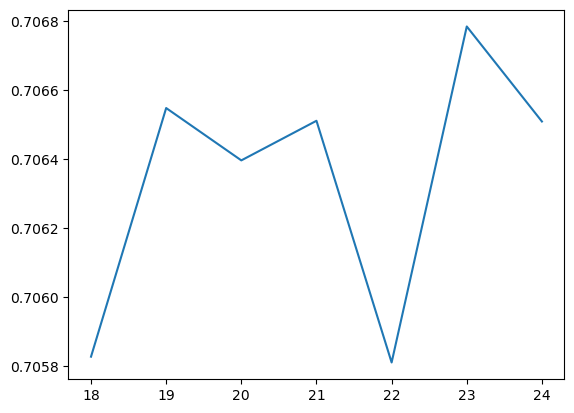

In [81]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

scores=[]
for i in range(18,25):
      knn=KNeighborsRegressor(n_neighbors=i)
      knn.fit(X_train,y_train)
      y_pred=knn.predict(X_test)
      scores.append(r2_score(y_test,y_pred))

  # print(scores)
import matplotlib.pyplot as plt
plt.plot(range(18,25),scores)



In [83]:
# As 23 is optimal value

Knn=KNeighborsRegressor(n_neighbors=23)
Knn.fit(X_train,y_train)
y_pred=Knn.predict(X_test)
r2_score(y_test,y_pred)


0.7067841190646827

### LINEAR REGRESSION

In [85]:
from sklearn.preprocessing import PolynomialFeatures
poly= PolynomialFeatures(degree=2)
X_train=poly.fit_transform(X_train)
X_test=poly.transform(X_test)


In [87]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
r2_score(y_test,y_pred)


0.6856719474168967

### PCA

In [91]:
from sklearn.decomposition import PCA
pca=PCA(n_components=6)
X_train=pca.fit_transform(X_train)
X_test=pca.transform(X_test)

### DECISION TREE 

In [94]:
# import the regressor 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import r2_score
DT= DecisionTreeRegressor(random_state = 0) 
DT.fit(X_train,y_train)
y_pred=DT.predict(X_test)
r2_score(y_test,y_pred)



0.34938516388737084

### RANDOM FOREST

In [101]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
RF=RandomForestRegressor(max_samples=0.75,n_jobs=-1)
RF.fit(X_train,y_train)
y_pred=RF.predict(X_test)
r2_score(y_test,y_pred)



0.6929560565666719